In [14]:
import pandas as pd
import numpy as np

In [2]:
names = pd.read_csv("segmentation_names.txt", header=None)
names

,0
0,REGION-CENTROID-COL
1,REGION-CENTROID-ROW
2,REGION-PIXEL-COUNT
3,SHORT-LINE-DENSITY-5
4,SHORT-LINE-DENSITY-2
5,VEDGE-MEAN
6,VEDGE-SD
7,HEDGE-MEAN
8,HEDGE-SD
9,INTENSITY-MEAN


In [18]:
data = pd.read_csv("segmentation_data.txt", header = None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,110.0,189.0,9,0.000000,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.000000,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.000000,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.000000,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.000000,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,32.0,158.0,9,0.000000,0.0,0.944445,0.862963,0.833333,0.611111,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834
2096,8.0,162.0,9,0.111111,0.0,1.611111,2.062962,0.333333,0.133333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946
2097,128.0,161.0,9,0.000000,0.0,0.555555,0.251852,0.777778,0.162963,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307
2098,150.0,158.0,9,0.000000,0.0,2.166667,1.633334,1.388889,0.418518,8.444445,7.000000,12.222222,6.111111,-4.333334,11.333333,-7.000000,12.222222,0.503086,-1.943449


In [13]:
classes = pd.read_csv("segmentation_classes.txt", header = None, sep = "\t")
classes

,0,1
0,GRASS,0
1,GRASS,0
2,GRASS,0
3,GRASS,0
4,GRASS,0
...,...,...
2095,CEMENT,3
2096,CEMENT,3
2097,CEMENT,3
2098,CEMENT,3


In [15]:
np.unique(classes[0])

array(['BRICKFACE', 'CEMENT', 'FOLIAGE', 'GRASS', 'PATH', 'SKY', 'WINDOW'],
      dtype=object)

In [19]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(data)
data_norm

array([[0.43083004, 0.74166667, 0.        , ..., 0.12371135, 0.50813884,
        0.83184923],
       [0.33596838, 0.73333333, 0.        , ..., 0.12739322, 0.46332908,
        0.83698646],
       [0.88537549, 0.97083333, 0.        , ..., 0.11340205, 0.48014903,
        0.84478233],
       ...,
       [0.50197628, 0.625     , 0.        , ..., 0.07216495, 0.5409177 ,
        0.17591546],
       [0.58893281, 0.6125    , 0.        , ..., 0.08100147, 0.50308645,
        0.18478933],
       [0.48616601, 0.62916667, 0.        , ..., 0.09646539, 0.4799313 ,
        0.17037463]])

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(data_norm)
kmeans.cluster_centers_

array([[7.48273727e-01, 5.32040663e-01, 0.00000000e+00, 3.91566253e-02,
        3.76506024e-02, 1.13530170e-01, 1.89223845e-02, 1.07311223e-01,
        1.76269993e-02, 2.98573078e-01, 2.77520947e-01, 3.50080735e-01,
        2.63837104e-01, 5.93300449e-01, 4.49241676e-01, 3.11452658e-01,
        3.50162801e-01, 3.03046926e-01, 1.64359304e-01],
       [5.35098814e-01, 1.50166667e-01, 0.00000000e+00, 2.77777769e-02,
        1.66666667e-03, 3.02281387e-02, 5.42887957e-04, 2.67660451e-02,
        5.86661900e-04, 8.23246433e-01, 7.79716377e-01, 8.94170356e-01,
        7.88760696e-01, 2.70665440e-01, 6.66372551e-01, 2.89386481e-01,
        8.94170356e-01, 2.11804171e-01, 1.25065773e-01],
       [2.53602814e-01, 4.59865407e-01, 0.00000000e+00, 2.63459328e-02,
        1.37457045e-02, 3.73368364e-02, 2.36990363e-03, 2.79012170e-02,
        2.02174405e-03, 2.59422230e-02, 1.77752903e-02, 4.22796815e-02,
        1.64643108e-02, 7.69272199e-01, 2.16203765e-01, 5.08343293e-01,
        4.32513955e-02

In [28]:
kmeans.cluster_centers_.T.shape

(19, 7)

In [51]:
centroids = pd.DataFrame(kmeans.cluster_centers_.T, columns = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4','Cluster_5','Cluster_6', 'Cluster_7'])
centroids

,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7
0,0.748274,0.535099,0.253603,0.513994,0.302506,0.251678,0.769063
1,0.532041,0.150167,0.459865,0.808937,0.530862,0.392749,0.425930
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.039157,0.027778,0.026346,0.077441,0.052260,0.075622,0.014024
4,0.037651,0.001667,0.013746,0.005051,0.046610,0.019403,0.022654
5,0.113530,0.030228,0.037337,0.054474,0.100817,0.077657,0.039702
6,0.018922,0.000543,0.002370,0.001407,0.009420,0.004149,0.002983
7,0.107311,0.026766,0.027901,0.046335,0.083972,0.061240,0.023116
8,0.017627,0.000587,0.002022,0.001401,0.011043,0.005037,0.002094
9,0.298573,0.823246,0.025942,0.108790,0.400608,0.147428,0.040385


In [39]:
from sklearn.metrics import completeness_score, homogeneity_score

In [40]:
kmeans.labels_

array([3, 3, 3, ..., 6, 6, 5], dtype=int32)

In [41]:
a = completeness_score(classes[1], kmeans.labels_)
print("The completeness score is:", a)

The completeness score is: 0.6117374684331665


In [42]:
b = homogeneity_score(classes[1], kmeans.labels_)
print("The homogeneity score is:", b)

The homogeneity score is: 0.6100499914689614


In [43]:
from sklearn import decomposition

In [49]:
#lets get as many PC's as there are columns and decide how many PC's to throw away later
pca = decomposition.PCA()
pca.fit_transform(data_norm)
pca.explained_variance_ratio_

array([6.07142340e-01, 1.31969792e-01, 1.01237729e-01, 4.54353920e-02,
       3.54736114e-02, 1.98803550e-02, 1.89197030e-02, 1.61540880e-02,
       1.06560085e-02, 7.11337518e-03, 3.92203525e-03, 1.57500309e-03,
       4.89150725e-04, 3.14164135e-05, 2.36381041e-16, 1.58615946e-16,
       1.52966845e-16, 1.44466875e-16, 3.85879376e-35])

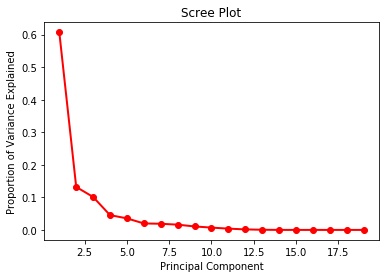

In [48]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [54]:
## From the scree plot, the knee is around 5-7 components
##lets check the cumulative variance captured by component

In [50]:
print(pca.explained_variance_ratio_.cumsum())

[0.60714234 0.73911213 0.84034986 0.88578525 0.92125886 0.94113922
 0.96005892 0.97621301 0.98686902 0.99398239 0.99790443 0.99947943
 0.99996858 1.         1.         1.         1.         1.
 1.        ]


In [52]:
pd.DataFrame(pca.explained_variance_ratio_.cumsum())

,0
0,0.607142
1,0.739112
2,0.840350
3,0.885785
4,0.921259
5,0.941139
6,0.960059
7,0.976213
8,0.986869
9,0.993982


In [53]:
## For 95% varaince captured, we can take 7 components, that gives us 96% variance captured

In [56]:
pca = decomposition.PCA(n_components = 7)
pca_data = pca.fit_transform(data_norm)
pca_data.shape

(2100, 7)

In [57]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(pca_data)
kmeans.cluster_centers_

array([[ 1.41452711,  0.0872227 ,  0.03676534, -0.17319537, -0.02992247,
        -0.00897281, -0.02157291],
       [-0.60370483, -0.35550285,  0.10919651, -0.12979947, -0.1309111 ,
        -0.02160283, -0.04388193],
       [ 0.17739221,  0.04381971, -0.26494559,  0.18454611,  0.02677068,
         0.02440916,  0.00341651],
       [ 0.43588833, -0.10529857,  0.1652571 ,  0.233499  , -0.04503119,
        -0.00727238,  0.01504941],
       [-0.61926803,  0.64024955,  0.1958285 , -0.08685588, -0.06775977,
         0.00886611,  0.03837202],
       [-0.51040936, -0.06468741, -0.33636274, -0.06500755,  0.0789623 ,
         0.0062267 , -0.02632632],
       [-0.20742333, -0.24636635,  0.15253216,  0.05661766,  0.13031089,
        -0.00570357,  0.03304526]])

In [58]:
centroids = pd.DataFrame(kmeans.cluster_centers_.T, columns = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4','Cluster_5','Cluster_6', 'Cluster_7'])
centroids

,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7
0,1.414527,-0.603705,0.177392,0.435888,-0.619268,-0.510409,-0.207423
1,0.087223,-0.355503,0.043820,-0.105299,0.640250,-0.064687,-0.246366
2,0.036765,0.109197,-0.264946,0.165257,0.195829,-0.336363,0.152532
3,-0.173195,-0.129799,0.184546,0.233499,-0.086856,-0.065008,0.056618
4,-0.029922,-0.130911,0.026771,-0.045031,-0.067760,0.078962,0.130311
5,-0.008973,-0.021603,0.024409,-0.007272,0.008866,0.006227,-0.005704
6,-0.021573,-0.043882,0.003417,0.015049,0.038372,-0.026326,0.033045


In [59]:
a = completeness_score(classes[1], kmeans.labels_)
print("The completeness score is:", a)

The completeness score is: 0.611574926991677


In [60]:
b = homogeneity_score(classes[1], kmeans.labels_)
print("The homogeneity score is:", b)

The homogeneity score is: 0.6099736092174176


## The completeness and homogeniety scores are pretty much the same when you use the original data set vs the PCA transformed data set, there is not much a of a difference.